In [2]:
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap


DF = pd.read_csv('covid19tests.csv')




FileNotFoundError: [Errno 2] No such file or directory: 'covid19tests.csv'

In [ ]:
#Data Cleaning
#quitar comas otros characteres de columnas numericass
DF['tests'] = DF['tests'].str.replace(",", "")
DF['tests'] = DF['tests'].str.replace("*", "")
DF['positive'] = DF['positive'].str.replace(",", "")
DF['positive'] = DF['positive'].str.replace("*", "")

DF['testper1m'] = DF['testper1m'].str.replace(",", "")
#cambiar el tipo de columnas a numeros de punto flotante
DF["tests"]= DF['tests'].astype(float)
DF["positive"]= DF['positive'].astype(float)
DF["testper1m"]= DF['testper1m'].astype(float)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
DF.head(10)

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0
5,NaN,Bahrain,BHR,BH,37996.0,668.0,3-Apr,24210.0,17.6
6,NaN,Bangladesh,BGD,BD,1602.0,54.0,1-Apr,10.0,33.7
7,NaN,Barbados,BRB,BB,382.0,45.0,1-Apr,1331.0,118.0
8,NaN,Belarus,BLR,BY,32000.0,362.0,3-Apr,3371.0,11.3
9,NaN,Belgium,BEL,BE,18360.0,1486.0,18-Mar,1594.0,81.0


In [ ]:
DF.tail(10)

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m
101,Illinos,US,USA,US,43656.0,7695.0,2-Apr,3445.0,176.0
102,Louisiana,US,USA,US,51086.0,9150.0,2-Apr,10963.0,126.0
103,New York,US,USA,US,238965.0,92381.0,2-Apr,12284.0,387.0
104,New Jersey,US,USA,US,59110.0,25590.0,2-Apr,6655.0,433.0
105,Michigan,US,USA,US,22684.0,10791.0,2-Apr,2264.0,476.0
106,Texas,US,USA,US,50679.0,4669.0,2-Apr,1748.0,92.0
107,Washington,US,USA,US,79418.0,6585.0,1-Apr,10429.0,86.0
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4
110,NaN,Vietnam,VNM,VN,73164.0,233.0,3-Apr,760.0,3.2


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         31 non-null     object 
 1   country        111 non-null    object 
 2   alpha3code     110 non-null    object 
 3   alpha2code     111 non-null    object 
 4   tests          111 non-null    float64
 5   positive       109 non-null    float64
 6   date           111 non-null    object 
 7   testper1m      111 non-null    float64
 8   positiveper1m  110 non-null    float64
dtypes: float64(4), object(5)
memory usage: 7.9+ KB


In [ ]:
DF.shape

(111, 9)

In [ ]:
DF["ratepositive"] = DF.positive/DF.tests
DF

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0,0.199463
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0,0.184013
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0,0.019318
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0,0.115412
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0,0.014767
...,...,...,...,...,...,...,...,...,...,...
106,Texas,US,USA,US,50679.0,4669.0,2-Apr,1748.0,92.0,0.092129
107,Washington,US,USA,US,79418.0,6585.0,1-Apr,10429.0,86.0,0.082916
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0,0.122887
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4,0.080382


In [ ]:
df_c = DF[DF["region"].isnull()]
df_c

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0,0.199463
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0,0.184013
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0,0.019318
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0,0.115412
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0,0.014767
...,...,...,...,...,...,...,...,...,...,...
97,NaN,United Kingdom,GBR,GB,163194.0,33718.0,2-Apr,2416.0,207.0,0.206613
98,NaN,US,USA,US,1350219.0,241734.0,2-Apr,4114.0,179.0,0.179033
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0,0.122887
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4,0.080382


In [ ]:
df_usa = DF[DF["alpha3code"] == "USA"]
df_usa = df_usa[df_usa["region"].notnull()]
df_usa

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
99,California,US,USA,US,92500.0,9191.0,2-Apr,2341.0,99.0,0.099362
100,Florida,US,USA,US,80356.0,9008.0,3-Apr,3741.0,115.0,0.112101
101,Illinos,US,USA,US,43656.0,7695.0,2-Apr,3445.0,176.0,0.176264
102,Louisiana,US,USA,US,51086.0,9150.0,2-Apr,10963.0,126.0,0.179110
103,New York,US,USA,US,238965.0,92381.0,2-Apr,12284.0,387.0,0.386588
104,New Jersey,US,USA,US,59110.0,25590.0,2-Apr,6655.0,433.0,0.432922
105,Michigan,US,USA,US,22684.0,10791.0,2-Apr,2264.0,476.0,0.475710
106,Texas,US,USA,US,50679.0,4669.0,2-Apr,1748.0,92.0,0.092129
107,Washington,US,USA,US,79418.0,6585.0,1-Apr,10429.0,86.0,0.082916


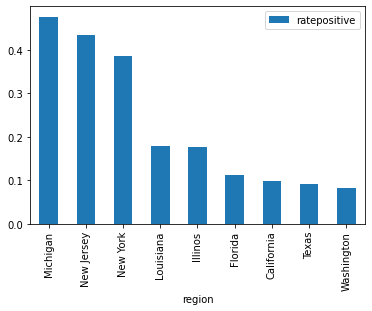

In [ ]:
plot_rate_us = pd.DataFrame(df_usa.groupby(by='region').ratepositive.sum())
plot_rate_us = plot_rate_us.sort_values("ratepositive", ascending=False).head(10)

plot_rate_us.plot(kind='bar')

In [ ]:
DF.describe()

,tests,positive,testper1m,positiveper1m,ratepositive
count,1.110000e+02,109.000000,111.000000,110.000000,109.000000
mean,8.244671e+04,9395.788991,5641.882883,105.740909,0.107642
std,1.797698e+05,28110.319628,7416.403319,99.158814,0.099421
min,1.800000e+01,0.000000,10.000000,0.000000,0.000000
25%,7.263000e+03,443.000000,764.500000,31.675000,0.033708
50%,3.021300e+04,1380.000000,3031.000000,79.200000,0.080837
75%,6.710950e+04,6585.000000,8651.500000,143.750000,0.144438
max,1.350219e+06,241734.000000,57459.000000,476.000000,0.475710


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


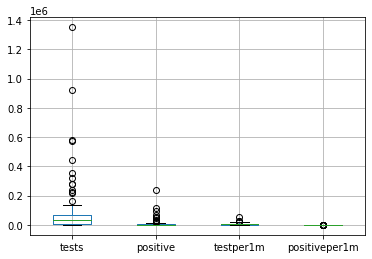

In [ ]:
boxplot = DF.boxplot(column= ["tests","positive", "testper1m", "positiveper1m" ])

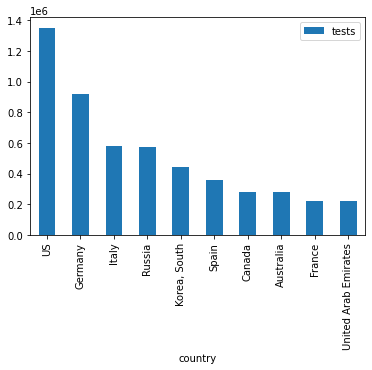

In [ ]:
plot_test = pd.DataFrame(df_c.groupby(by='country').tests.sum())
plot_test = plot_test.sort_values("tests", ascending=False).head(10)

plot_test.plot(kind='bar')





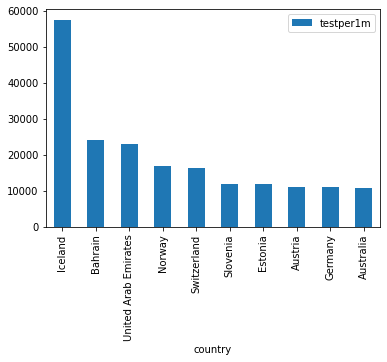

In [ ]:
plot_testpm = pd.DataFrame(df_c.groupby(by='country').testper1m.sum())
plot_testpm = plot_testpm.sort_values("testper1m", ascending=False).head(10)

plot_testpm.plot(kind='bar')

